In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os

infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cobining_EXTENDEDsmwithMajorSM/BS_melanoma_cfDNA_relative.txt'
majorlineagefile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cobining_EXTENDEDsmwithMajorSM/BS_majorlineageSM.txt'

outname=infile+"_"+os.path.basename(majorlineagefile)+"_zscore"

indf=pd.read_csv(infile,sep='\t',index_col='Mixture')
indf.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Total,Response,Toxicity
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,YUCLUE,2.493639,2.464160,2.490712,3.141181,4.396388,4.806204,4.119200,3.264635,4.716480,...,3.705564,3.496888,11.678026,3.197163,8.854778,2.034696,2.610428,100,NDB,NaN
tot-YUMARS_15-3443-cfDNA,YUMARS,2.494741,2.525881,2.529701,3.624588,5.597168,5.382108,4.511471,3.157593,4.364970,...,3.837251,3.462013,11.058916,3.186244,8.419081,1.977156,2.580922,100,DCB,NaN
tot-YUMICRO_20-4006-cfDNA,YUMICRO,3.328265,3.491512,3.306904,2.868509,4.253649,5.836782,5.787147,4.643044,4.217909,...,5.294548,3.189113,8.359426,4.619817,5.500469,2.522093,2.391333,100,NDB,NaN
tot-YUMOTE_17-3755-cfDNA,YUMOTE,2.728999,2.936065,2.912076,2.629696,5.241654,5.774284,5.465563,3.550091,3.929663,...,4.593062,2.964417,10.225553,3.977248,7.891040,2.374546,2.636142,100,NDB,NaN
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,4.420184,3.933808,8.091075,4.129331,6.133583,1.957386,3.268887,100,DCB,1.0


In [2]:
toxdf=indf[indf['Response'].notna()]
toxdf.shape

(22, 26)

NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.273e-02 U_stat=1.900e+01


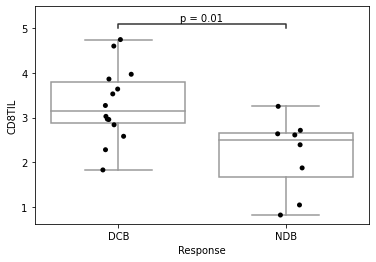

In [3]:
y='CD8TIL'
x='Response'
order=['DCB','NDB']

plottingdf=toxdf

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [4]:
majorlineageDF=pd.read_csv(majorlineagefile,sep='\t',index_col='Mixture')
majorlineageDF.head()

,Mono,Bcell,CD4,CD8,NK
Mixture,,,,,
Y-3674-cfDNA,64.967443,6.123511,7.537161,7.654764,13.717121
Y-3685-cfDNA,56.367785,7.374727,10.657174,9.571538,16.028775
Y-3688-cfDNA,44.519744,11.976250,13.739127,11.347472,18.417407
Y-3694-cfDNA,57.912697,7.876848,12.929012,7.551904,13.729540
Y-3703-cfDNA,51.785331,8.075110,12.069571,11.975249,16.094739


In [5]:
majorlineageDF.shape

(35, 5)

In [6]:
toxdfmerged_with_majorSM=toxdf.merge(majorlineageDF,how='inner',left_index=True,right_index=True)
toxdfmerged_with_majorSM.shape

(22, 31)

In [7]:
toxdfmerged_with_majorSM.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,...,Memory B,CD8TIL,Total,Response,Toxicity,Mono_y,Bcell,CD4,CD8,NK_y
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,YUCLUE,2.493639,2.464160,2.490712,3.141181,4.396388,4.806204,4.119200,3.264635,4.716480,...,2.034696,2.610428,100,NDB,NaN,56.263777,8.237874,11.785509,10.368726,13.344114
tot-YUMARS_15-3443-cfDNA,YUMARS,2.494741,2.525881,2.529701,3.624588,5.597168,5.382108,4.511471,3.157593,4.364970,...,1.977156,2.580922,100,DCB,NaN,55.812359,8.745419,10.232931,9.467874,15.741417
tot-YUMICRO_20-4006-cfDNA,YUMICRO,3.328265,3.491512,3.306904,2.868509,4.253649,5.836782,5.787147,4.643044,4.217909,...,2.522093,2.391333,100,NDB,NaN,38.410836,8.287642,19.692752,17.344683,16.264086
tot-YUMOTE_17-3755-cfDNA,YUMOTE,2.728999,2.936065,2.912076,2.629696,5.241654,5.774284,5.465563,3.550091,3.929663,...,2.374546,2.636142,100,NDB,NaN,51.738191,10.847547,14.395372,11.094100,11.924790
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,1.957386,3.268887,100,DCB,1.0,56.196056,8.166483,15.055818,9.405084,11.176560


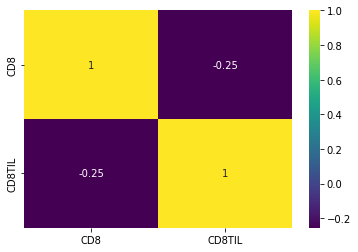

In [8]:
onlythosethreeCT=toxdfmerged_with_majorSM[['CD8','CD8TIL']]
corr = onlythosethreeCT.corr(method='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='viridis',annot=True)
plt.savefig(infile + '_CD4thosethree_crosscorrelation.pdf', bbox_inches='tight')

In [9]:
toxdfmerged_with_majorSM['CD8TIL_dividedby_CD8']=toxdfmerged_with_majorSM['CD8TIL']/toxdfmerged_with_majorSM['CD8']

toxdfmerged_with_majorSM.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD8TIL,Total,Response,Toxicity,Mono_y,Bcell,CD4,CD8,NK_y,CD8TIL_dividedby_CD8
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,YUCLUE,2.493639,2.464160,2.490712,3.141181,4.396388,4.806204,4.119200,3.264635,4.716480,...,2.610428,100,NDB,NaN,56.263777,8.237874,11.785509,10.368726,13.344114,0.251760
tot-YUMARS_15-3443-cfDNA,YUMARS,2.494741,2.525881,2.529701,3.624588,5.597168,5.382108,4.511471,3.157593,4.364970,...,2.580922,100,DCB,NaN,55.812359,8.745419,10.232931,9.467874,15.741417,0.272598
tot-YUMICRO_20-4006-cfDNA,YUMICRO,3.328265,3.491512,3.306904,2.868509,4.253649,5.836782,5.787147,4.643044,4.217909,...,2.391333,100,NDB,NaN,38.410836,8.287642,19.692752,17.344683,16.264086,0.137871
tot-YUMOTE_17-3755-cfDNA,YUMOTE,2.728999,2.936065,2.912076,2.629696,5.241654,5.774284,5.465563,3.550091,3.929663,...,2.636142,100,NDB,NaN,51.738191,10.847547,14.395372,11.094100,11.924790,0.237617
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,3.268887,100,DCB,1.0,56.196056,8.166483,15.055818,9.405084,11.176560,0.347566


NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.053e-02 U_stat=8.400e+01


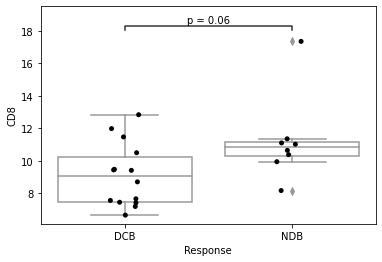

In [10]:
y='CD8'
x='Response'
order=['DCB','NDB']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.018e-03 U_stat=1.600e+01


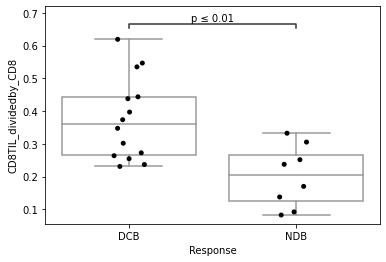

In [11]:
y='CD8TIL_dividedby_CD8'
x='Response'
order=['DCB','NDB']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [12]:
col='CD8TIL_dividedby_CD8'
toxdfmerged_with_majorSM[col+" (z-score)"] = (toxdfmerged_with_majorSM[col] - toxdfmerged_with_majorSM[col].mean())/toxdfmerged_with_majorSM[col].std(ddof=0)




NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.018e-03 U_stat=1.600e+01


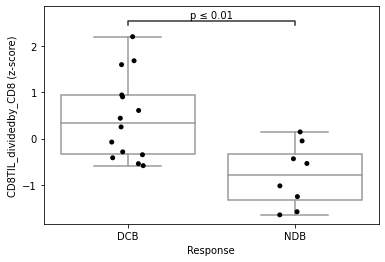

In [13]:
y='CD8TIL_dividedby_CD8 (z-score)'
x='Response'
order=['DCB','NDB']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [14]:
toxdfmerged_with_majorSM.to_csv(outname+".txt",sep='\t')